## EXPLORAÇÃO DOS DADOS
### ANÁLISES DESCRITIVAS

O uso do dataframe df_cars_train na análise descritiva é importante porque ele contém a variável alvo "preço" dos carros, que é fundamental para entender as relações entre as features e o preço. Analisar a distribuição, estatísticas descritivas e visualizar os dados do conjunto de treinamento nos permite compreender a variação e os padrões existentes na base de dados, bem como identificar possíveis outliers, tendências ou relações entre as features e o preço dos carros.

Já o dataframe df_cars_test será utilizado como conjunto de teste para avaliar a performance do modelo desenvolvido. Uma vez que o modelo tenha sido treinado com os dados do conjunto de treinamento, ele será aplicado ao conjunto de teste para fazer previsões de preços dos carros. Essas previsões serão comparadas com os valores reais do conjunto de teste para verificar a eficácia do modelo em fazer previsões precisas. Portanto, o df_cars_test é utilizado como uma amostra independente para avaliar a capacidade do modelo de generalizar e fazer previsões em dados não vistos anteriormente.

### Importando as Bibliotecas utéis

In [15]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importando o arquivo CSV

In [2]:
df_cars_train = pd.read_csv("df_cars_train_limpos.csv")

In [3]:
df_cars_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  29584 non-null  object 
 1   num_fotos           29584 non-null  float64
 2   marca               29584 non-null  object 
 3   modelo              29584 non-null  object 
 4   versao              29584 non-null  object 
 5   ano_de_fabricacao   29584 non-null  int64  
 6   ano_modelo          29584 non-null  float64
 7   hodometro           29584 non-null  float64
 8   cambio              29584 non-null  object 
 9   num_portas          29584 non-null  int64  
 10  tipo                29584 non-null  object 
 11  blindado            29584 non-null  object 
 12  cor                 29584 non-null  object 
 13  tipo_vendedor       29584 non-null  object 
 14  cidade_vendedor     29584 non-null  object 
 15  estado_vendedor     29584 non-null  object 
 16  anun

In [4]:
df_cars_train.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,preco
count,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04
mean,10.309931,2016.758552,2017.808985,58430.592077,3.940677,1.330239e+05
std,3.481502,4.062422,2.673930,32561.769309,0.338360,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,1.359813e+06


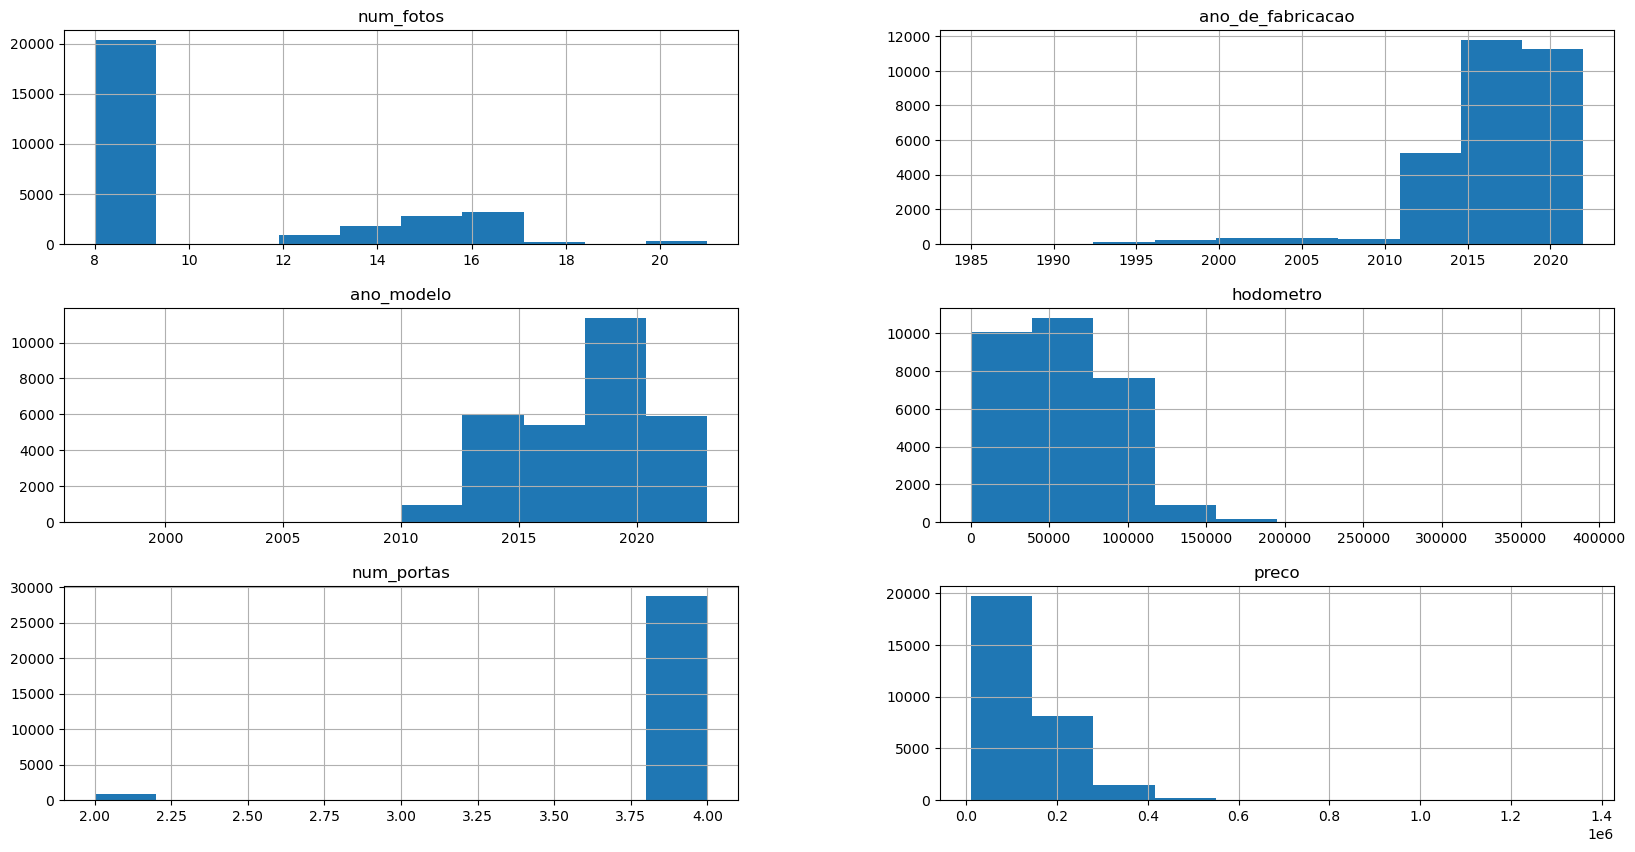

In [5]:
## ANALISANDO A DISTRIBUIÇÃO DOS DADOS NUMÉRICOS COM HISTOGRAMA
colunas_numericas = ['num_fotos','ano_de_fabricacao','ano_modelo', 'hodometro', 'num_portas', 'preco']
df_cars_train.loc[:,colunas_numericas].hist(figsize=(20,10))
plt.show()

A partir da analise das colunas numéricas do DataFrame, podemos obter os seguintes insights:

1. **num_fotos**: A média de fotos por carro é de aproximadamente 10.31, com um desvio padrão de 3.48. Isso indica que a maioria dos carros possui em torno de 10 fotos, mas há uma certa variação nessa quantidade.

2. **ano_de_fabricacao**: O ano médio de fabricação dos carros é cerca de 2016.76, com uma variação que vai de 1985 a 2022. Isso nos dá uma ideia da faixa de anos em que os carros foram fabricados no conjunto de dados.

3. **ano_modelo**: O ano médio do modelo dos carros é aproximadamente 2017.81, com uma variação que vai de 1997 a 2023. Esses valores mostram a distribuição dos anos de modelo dos carros no conjunto de dados.

4. **hodometro**: A média da quilometragem dos carros é de aproximadamente 58,430 km, com um desvio padrão de 32,561 km. Os quartis mostram que 25% dos carros têm uma quilometragem inferior a 31,214 km, 50% têm uma quilometragem inferior a 57,434 km e 75% têm uma quilometragem inferior a 81,953 km.

5. **num_portas**: A maioria dos carros possui 4 portas, conforme indicado pelo valor médio de 3.94. Isso sugere que a grande maioria dos carros no conjunto de dados é composta por veículos de 4 portas.

6. **preco**: O preço médio dos carros é de aproximadamente 133,023 reais, com um desvio padrão de 81,662 reais. Os quartis mostram que 25% dos carros possuem um preço inferior a 76,571 reais, 50% possuem um preço inferior a 114,356 reais e 75% possuem um preço inferior a 163,679 reais. Isso indica a faixa de preços dos carros no conjunto de dados.

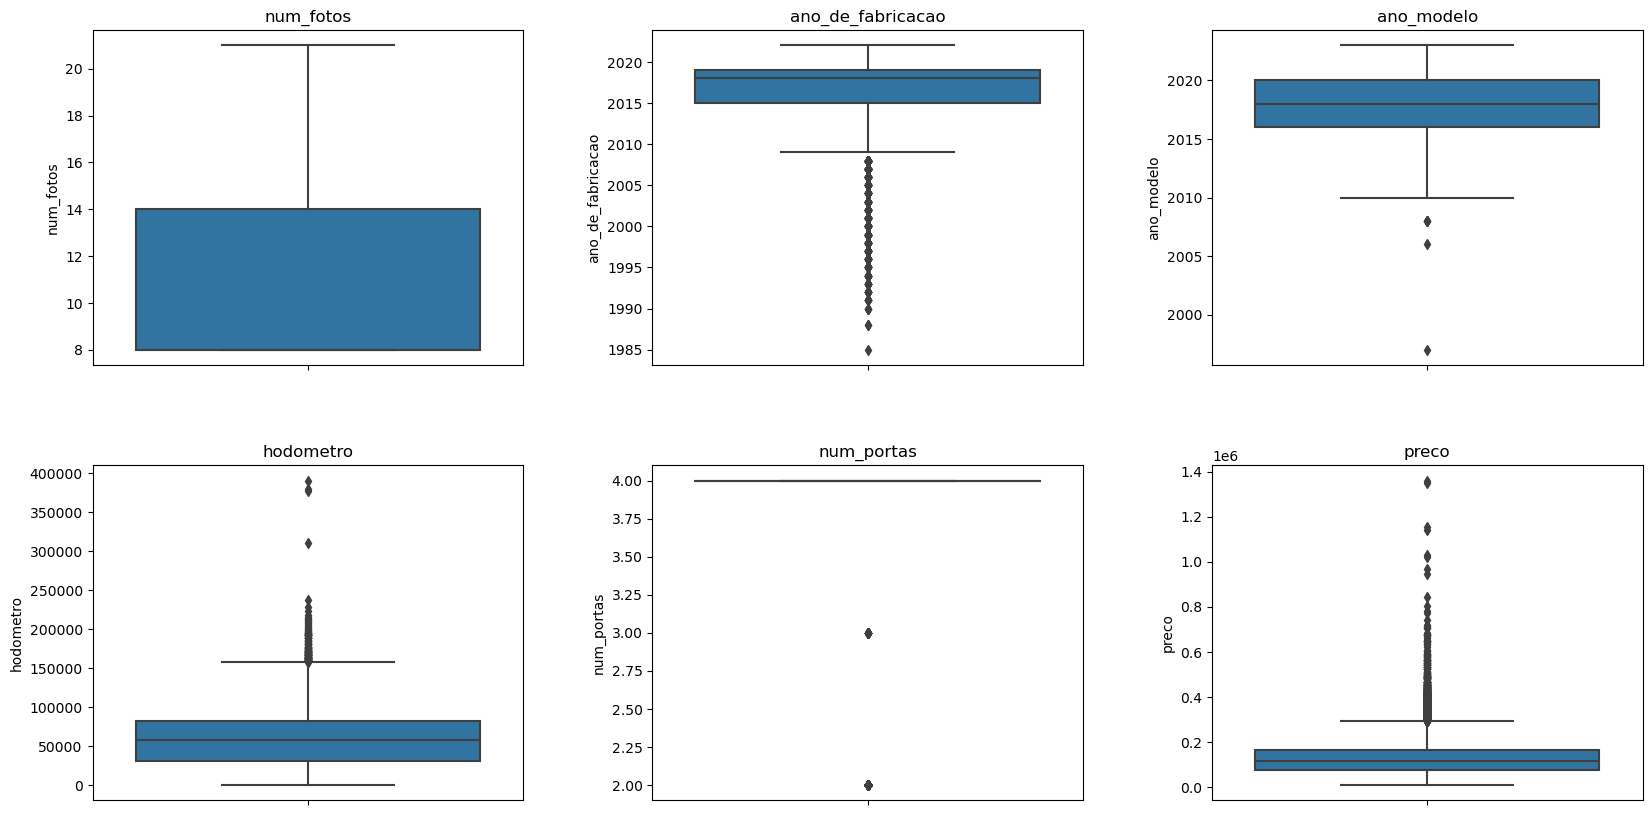

In [6]:
## ANALISANDO A DISTRIBUIÇÃO DOS DADOS COM BOXPLOT

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axs = axs.ravel()

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(y=coluna, data=df_cars_train, ax=axs[i], showfliers=True)
    axs[i].set_title(coluna)

plt.show()

Ao realizar uma análise visual dos dados, identificamos possíveis outliers em algumas das colunas do conjunto de dados, incluindo a coluna de preço (variável alvo). Agora vamos discutir possíveis abordagens para tratar esses outliers em cada uma das colunas mencionadas.

Coluna "ano_de_fabricacao":
Visualmente, observamos que existem valores menores que 2009, que podem ser considerados outliers. Vamos transformar esses valores substituindo-os pela mediana dos valores restantes.

Coluna "ano_modelo":
Valores menores que 2010 são identificados como possíveis outliers. Vamos transformar esses valores substituindo-os pela mediana dos valores restantes.

Coluna "hodometro":
Visualmente, observamos valores maiores que 160.000, que podem indicar a presença de outliers. Vamos transformar esses valores substituindo-os pela mediana dos valores restantes.

Coluna "num_portas":
Valores menores que 4 são considerados outliers. Assim como nas colunas anteriores, vamos transformar esses valores substituindo-os pela mediana dos valores restantes.

Coluna "preco":
Os valores extremos na coluna de preço podem representar transações reais de veículos com preços muito altos. Se esses valores são consistentes e representam casos válidos do mercado, removê-los ou transformá-los pode distorcer a distribuição dos preços e impactar negativamente a capacidade do modelo de prever preços reais.

In [7]:
# Tratando outliers na coluna 'ano_de_fabricacao'
mediana_fabricacao = df_cars_train['ano_de_fabricacao'].median()
df_cars_train.loc[df_cars_train['ano_de_fabricacao'] < 2009, 'ano_de_fabricacao'] = mediana_fabricacao

# Tratando outliers na coluna 'ano_modelo'
mediana_modelo = df_cars_train['ano_modelo'].median()
df_cars_train.loc[df_cars_train['ano_modelo'] < 2010, 'ano_modelo'] = mediana_modelo

# Tratando outliers na coluna 'hodometro'
mediana_hodometro = df_cars_train['hodometro'].median()
df_cars_train.loc[df_cars_train['hodometro'] > 160000, 'hodometro'] = mediana_hodometro

# Tratando outliers na coluna 'num_portas'
mediana_portas = df_cars_train['num_portas'].median()
df_cars_train.loc[df_cars_train['num_portas'] < 4, 'num_portas'] = mediana_portas


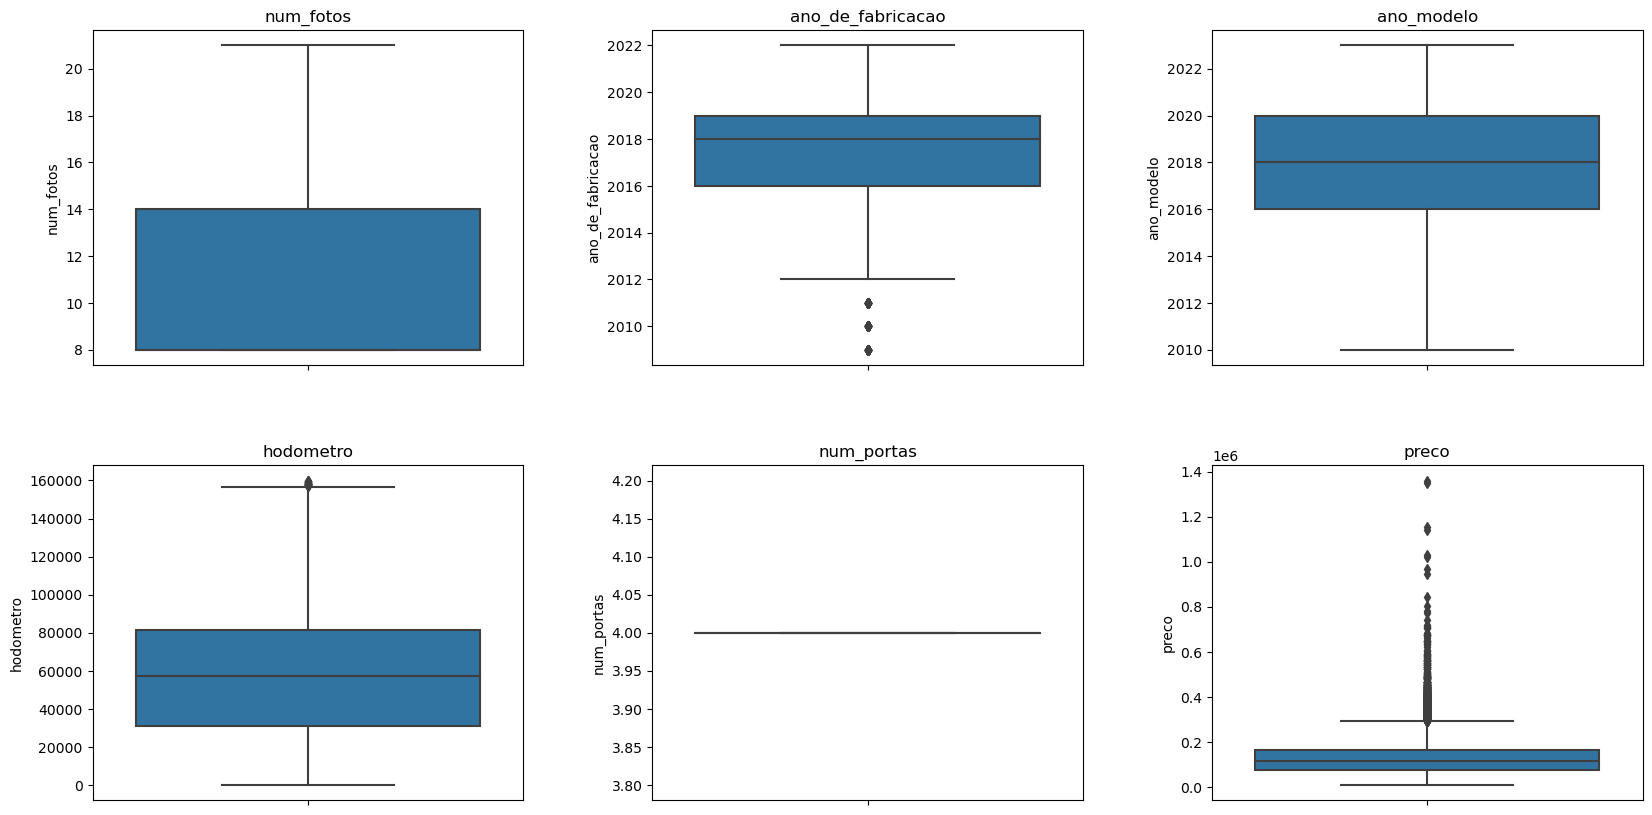

In [8]:
## OBSERVANDO COM BOXPLOT OS DADOS TRATADOS

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axs = axs.ravel()

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(y=coluna, data=df_cars_train, ax=axs[i], showfliers=True)
    axs[i].set_title(coluna)

plt.show()

## ANÁLISE CATEGÓRICA

Com base nas perguntas propostas no item 2 na seção 'Entregas' que você preciso responder, as colunas que são prioridades na minha análise são:

- marca: Para identificar a marca popular de carros na base de dados.
- estado_vendedor: Para determinar o melhor estado cadastrado na base de dados para venda de carros.
- tipo: Para identificar se o carro é uma picape.
- cambio: Para verificar se o carro possui transmissão automática.

### MARCA

In [9]:
# Explorar Dados Categórios
# MARCA
agrupado = df_cars_train.groupby(['marca']).size().sort_values(ascending=False)
print(agrupado)

marca
VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUBARU             41
SUZUKI             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
FERRARI             1
EFFA                1
BRM                 1
dtype: int64


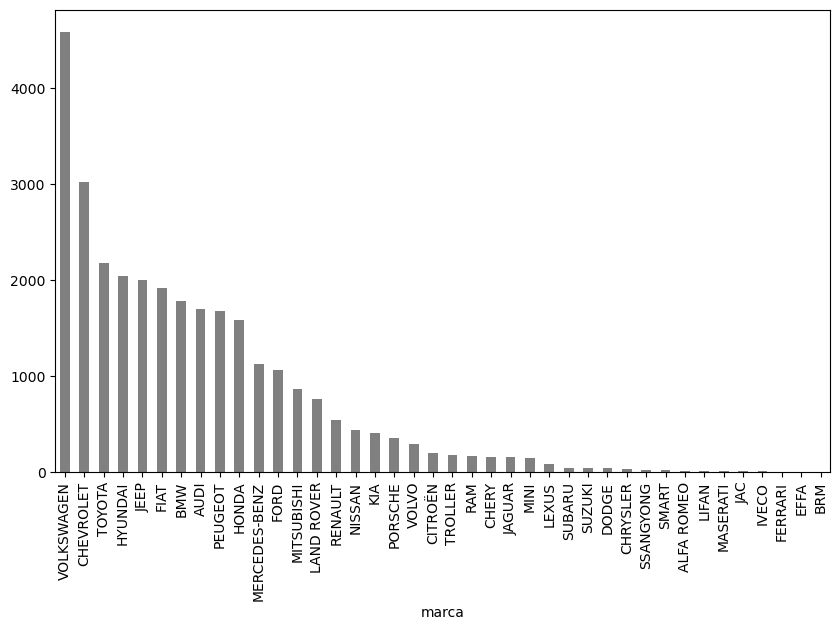

In [10]:
agrupado.plot.bar(color='gray', figsize=(10, 6))
plt.show()

## Insights


Com base nos dados da coluna "marca", podemos observar os seguintes insights:

A marca Volkswagen possui a maior quantidade de carros na base de dados, seguida por Chevrolet, Toyota, Hyundai e Jeep. Isso indica que essas marcas são populares entre os carros disponíveis para venda.

Marcas de luxo, como BMW, Audi, Mercedes-Benz e Porsche, também estão presentes na base de dados. Isso sugere a presença de carros de maior valor e possivelmente com recursos adicionais.

Algumas marcas possuem uma presença relativamente baixa na base de dados, como SsangYong, Smart, Alfa Romeo, Lifan, Maserati, JAC, Iveco, Ferrari, EFFA e BRM. Essas marcas podem representar segmentos de mercado mais específicos ou ter uma presença menos comum no mercado de carros usados.

### ESTADO VENDEDOR

In [11]:
# ESTADO VENDEDOR
agrupado = df_cars_train.groupby(['estado_vendedor']).size().sort_values(ascending=False)
print(agrupado)

estado_vendedor
São Paulo (SP)              16378
Rio de Janeiro (RJ)          2548
Paraná (PR)                  2526
Santa Catarina (SC)          2302
Minas Gerais (MG)            1775
Rio Grande do Sul (RS)       1646
Goiás (GO)                    789
Bahia (BA)                    604
Pernambuco (PE)               318
Alagoas (AL)                  125
Paraíba (PB)                  108
Rio Grande do Norte (RN)       90
Pará (PA)                      74
Ceará (CE)                     69
Amazonas (AM)                  51
Mato Grosso do Sul (MS)        35
Mato Grosso (MT)               33
Acre (AC)                      29
Sergipe (SE)                   24
Espírito Santo (ES)            21
Tocantins (TO)                 20
Maranhão (MA)                   7
Piauí (PI)                      6
Rondônia (RO)                   4
Roraima (RR)                    2
dtype: int64


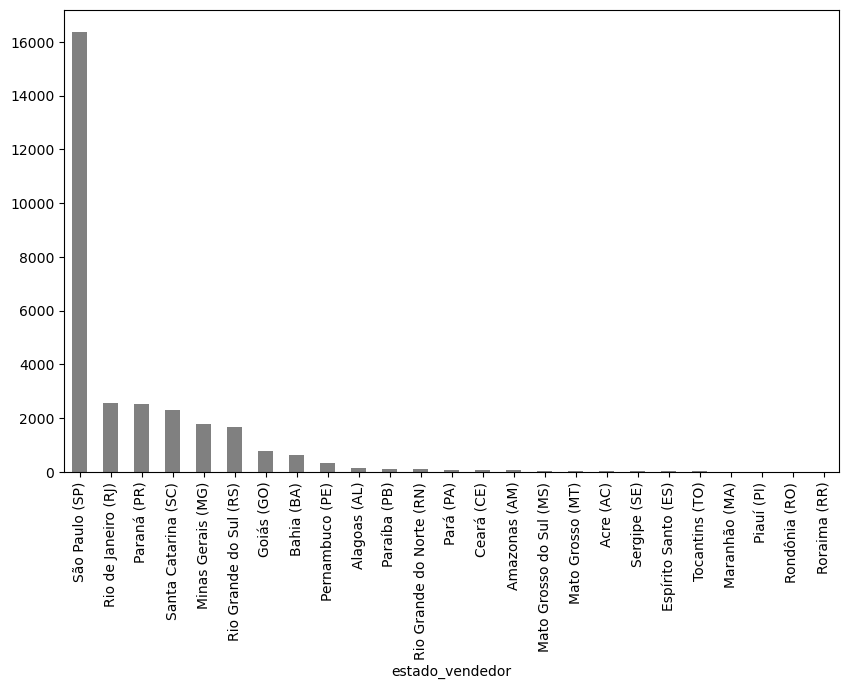

In [12]:
agrupado.plot.bar(color='gray', figsize=(10, 6))
plt.show()

## Insights

Com base nos dados da coluna "estado_vendedor", podemos observar os seguintes insights:

O estado de São Paulo (SP) possui a maior quantidade de vendedores na base de dados, seguido pelo Rio de Janeiro (RJ), Paraná (PR), Santa Catarina (SC) e Minas Gerais (MG). Isso indica que esses estados possuem uma presença significativa no mercado de venda de carros usados.

Estados como Alagoas (AL), Paraíba (PB), Rio Grande do Norte (RN), Pará (PA), Ceará (CE), Amazonas (AM), Mato Grosso do Sul (MS), Mato Grosso (MT), Acre (AC), Sergipe (SE), Espírito Santo (ES), Tocantins (TO), Maranhão (MA), Piauí (PI), Rondônia (RO) e Roraima (RR) possuem uma presença relativamente menor na base de dados. Isso pode indicar que o mercado de venda de carros usados é menos representativo ou menos ativo nesses estados.

### TIPO

In [13]:
# TIPO
agrupado = df_cars_train.groupby(['tipo']).size().sort_values(ascending=False)
print(agrupado)

tipo
Sedã                    16429
Hatchback                4924
Picape                   4849
Utilitário esportivo     3322
Perua/SW                   27
Cupê                       26
Minivan                     7
dtype: int64


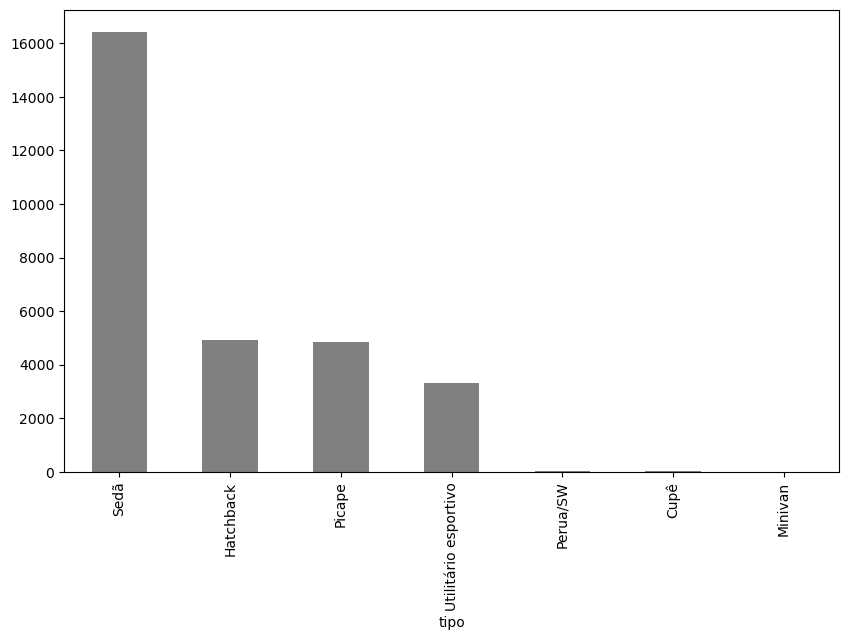

In [14]:
agrupado.plot.bar(color='gray', figsize=(10, 6))
plt.show()

## Insights

Com base nos dados da coluna "tipo", podemos observar os seguintes insights:

O tipo mais comum de veículo na base de dados é o Sedã, seguido pelo Hatchback e a Picape. Isso indica que esses tipos de veículos são populares e frequentemente disponíveis para venda.

Os tipos menos comuns de veículos na base de dados são Perua/SW, Cupê e Minivan. Esses tipos de veículos são menos representados na base de dados, o que pode indicar que são menos comuns no mercado de carros usados.

### CAMBIO

In [15]:
# CAMBIO
agrupado = df_cars_train.groupby(['cambio']).size().sort_values(ascending=False)
print(agrupado)

cambio
Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
dtype: int64


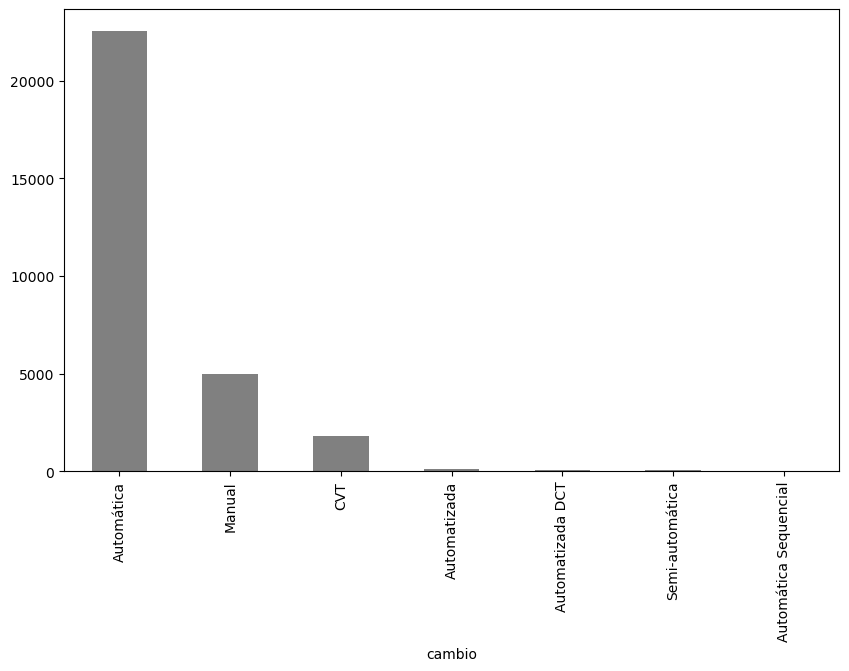

In [16]:
agrupado.plot.bar(color='gray', figsize=(10, 6))
plt.show()

## Insights

Com base nos dados da coluna "cambio", podemos observar os seguintes insights:

A maioria dos veículos na base de dados possui câmbio automático, representando a opção mais comum. Isso indica que os carros com transmissão automática são populares entre os veículos usados.

A opção de câmbio manual também é representativa na base de dados, embora seja menos comum do que o câmbio automático. Isso pode indicar que ainda existe uma demanda por carros com transmissão manual.

Outras opções de câmbio, como CVT, automatizada, automatizada DCT e semi-automática, são menos frequentes na base de dados. Isso pode indicar que essas opções de transmissão são menos comuns ou menos populares entre os veículos usados.

### Salvando o novo DataFrame df_cars_train_final tratado em um novo arquivo CSV

In [17]:
df_cars_train_final = df_cars_train.copy()  # Copia o DataFrame original para preservar os dados originais

# Salvar o DataFrame tratado em um novo arquivo CSV
df_cars_train_final.to_csv('df_cars_train_final.csv', index=False)

### Vamos aplicar o mesmo tratamento no dataframe df_cars_test

In [16]:
df_cars_test = pd.read_csv("df_cars_test_limpos.csv")

In [17]:
df_cars_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9862 entries, 0 to 9861
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9862 non-null   object 
 1   num_fotos           9862 non-null   float64
 2   marca               9862 non-null   object 
 3   modelo              9862 non-null   object 
 4   versao              9862 non-null   object 
 5   ano_de_fabricacao   9862 non-null   int64  
 6   ano_modelo          9862 non-null   float64
 7   hodometro           9862 non-null   float64
 8   cambio              9862 non-null   object 
 9   num_portas          9862 non-null   int64  
 10  tipo                9862 non-null   object 
 11  blindado            9862 non-null   object 
 12  cor                 9862 non-null   object 
 13  tipo_vendedor       9862 non-null   object 
 14  cidade_vendedor     9862 non-null   object 
 15  estado_vendedor     9862 non-null   object 
 16  anunci

In [8]:
df_cars_test.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas
count,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000
mean,10.309673,2016.716893,2017.801663,58237.207057,3.942507
std,3.456544,4.151105,2.679667,32487.018991,0.333749
min,8.000000,1988.000000,2007.000000,100.000000,2.000000
25%,8.000000,2015.000000,2016.000000,31323.250000,4.000000
50%,8.000000,2018.000000,2018.000000,56742.000000,4.000000
75%,14.000000,2019.000000,2020.000000,81784.000000,4.000000
max,21.000000,2022.000000,2023.000000,381728.000000,4.000000


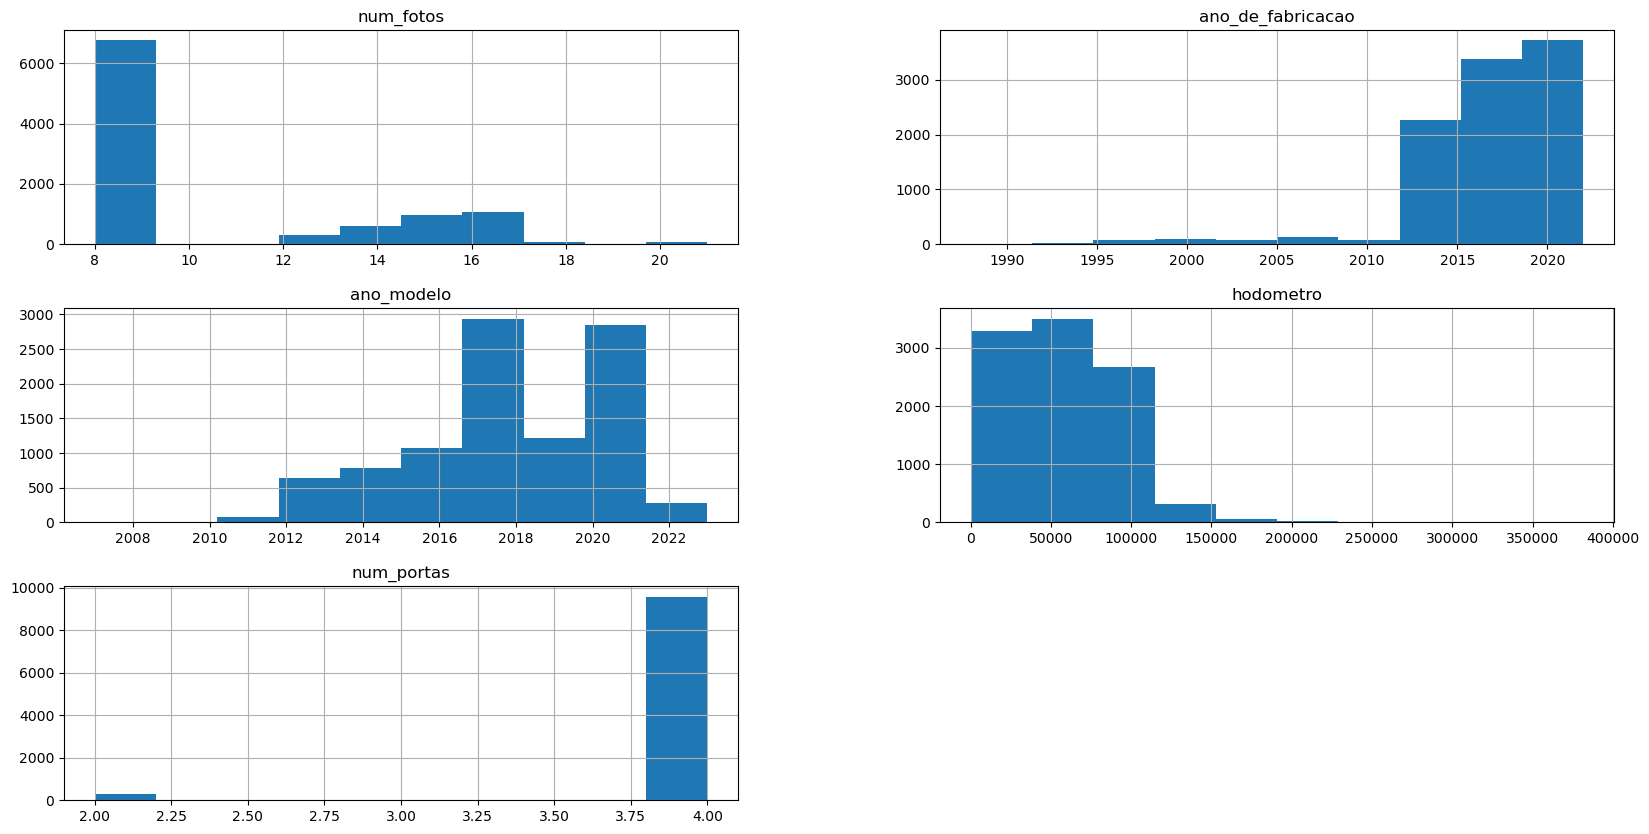

In [10]:
## ANALISANDO A DISTRIBUIÇÃO DOS DADOS NUMÉRICOS COM HISTOGRAMA
colunas_numericas = ['num_fotos','ano_de_fabricacao','ano_modelo', 'hodometro', 'num_portas']
df_cars_test.loc[:,colunas_numericas].hist(figsize=(20,10))
plt.show()

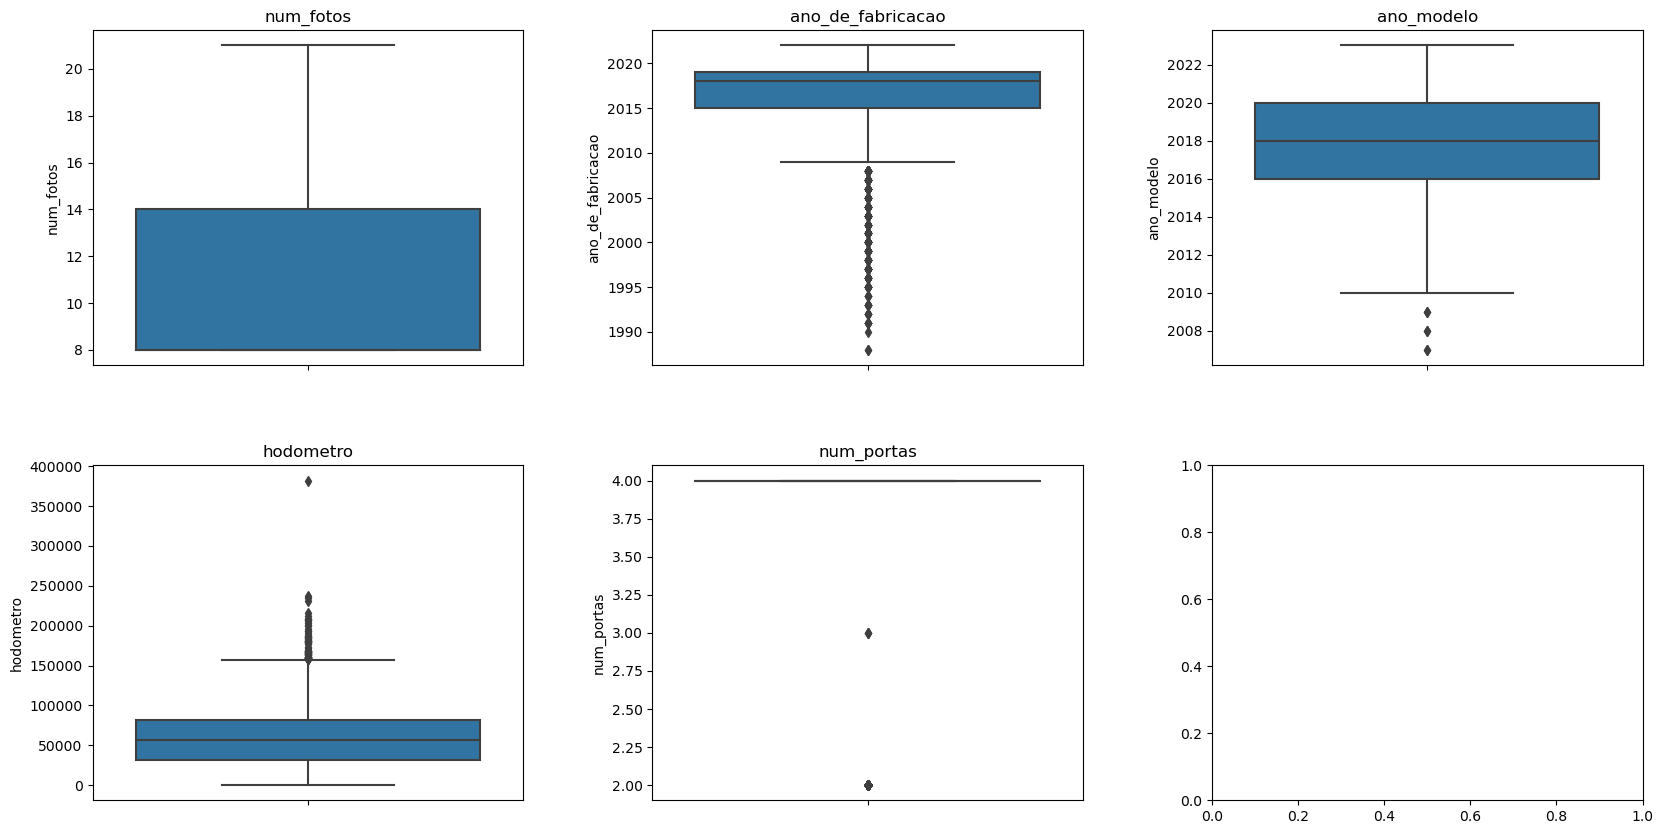

In [11]:
## ANALISANDO A DISTRIBUIÇÃO DOS DADOS COM BOXPLOT

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axs = axs.ravel()

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(y=coluna, data=df_cars_test, ax=axs[i], showfliers=True)
    axs[i].set_title(coluna)

plt.show()

Ao realizar uma análise visual dos dados, identificamos possíveis outliers em algumas das colunas do conjunto de dados. Agora vamos discutir possíveis abordagens para tratar esses outliers em cada uma das colunas mencionadas.

Coluna "ano_de_fabricacao": Visualmente, observamos que existem valores menores que 2009, que podem ser considerados outliers. Vamos transformar esses valores substituindo-os pela mediana dos valores restantes.

Coluna "ano_modelo": Valores menores que 2010 são identificados como possíveis outliers. Vamos transformar esses valores substituindo-os pela mediana dos valores restantes.

Coluna "hodometro": Visualmente, observamos valores maiores que 160.000, que podem indicar a presença de outliers. Vamos transformar esses valores substituindo-os pela mediana dos valores restantes.

Coluna "num_portas": Valores menores que 4 são considerados outliers. Assim como nas colunas anteriores, vamos transformar esses valores substituindo-os pela mediana dos valores restantes.

Exatamente igual ao dataframe df_cars_train

In [19]:
# Tratando outliers na coluna 'ano_de_fabricacao'
mediana_fabricacao_2 = df_cars_test['ano_de_fabricacao'].median()
df_cars_test.loc[df_cars_test['ano_de_fabricacao'] < 2009, 'ano_de_fabricacao'] = mediana_fabricacao_2

# Tratando outliers na coluna 'ano_modelo'
mediana_modelo_2 = df_cars_test['ano_modelo'].median()
df_cars_test.loc[df_cars_test['ano_modelo'] < 2010, 'ano_modelo'] = mediana_modelo_2

# Tratando outliers na coluna 'hodometro'
mediana_hodometro_2 = df_cars_test['hodometro'].median()
df_cars_test.loc[df_cars_test['hodometro'] > 160000, 'hodometro'] = mediana_hodometro_2

# Tratando outliers na coluna 'num_portas'
mediana_portas_2 = df_cars_test['num_portas'].median()
df_cars_test.loc[df_cars_test['num_portas'] < 4, 'num_portas'] = mediana_portas_2

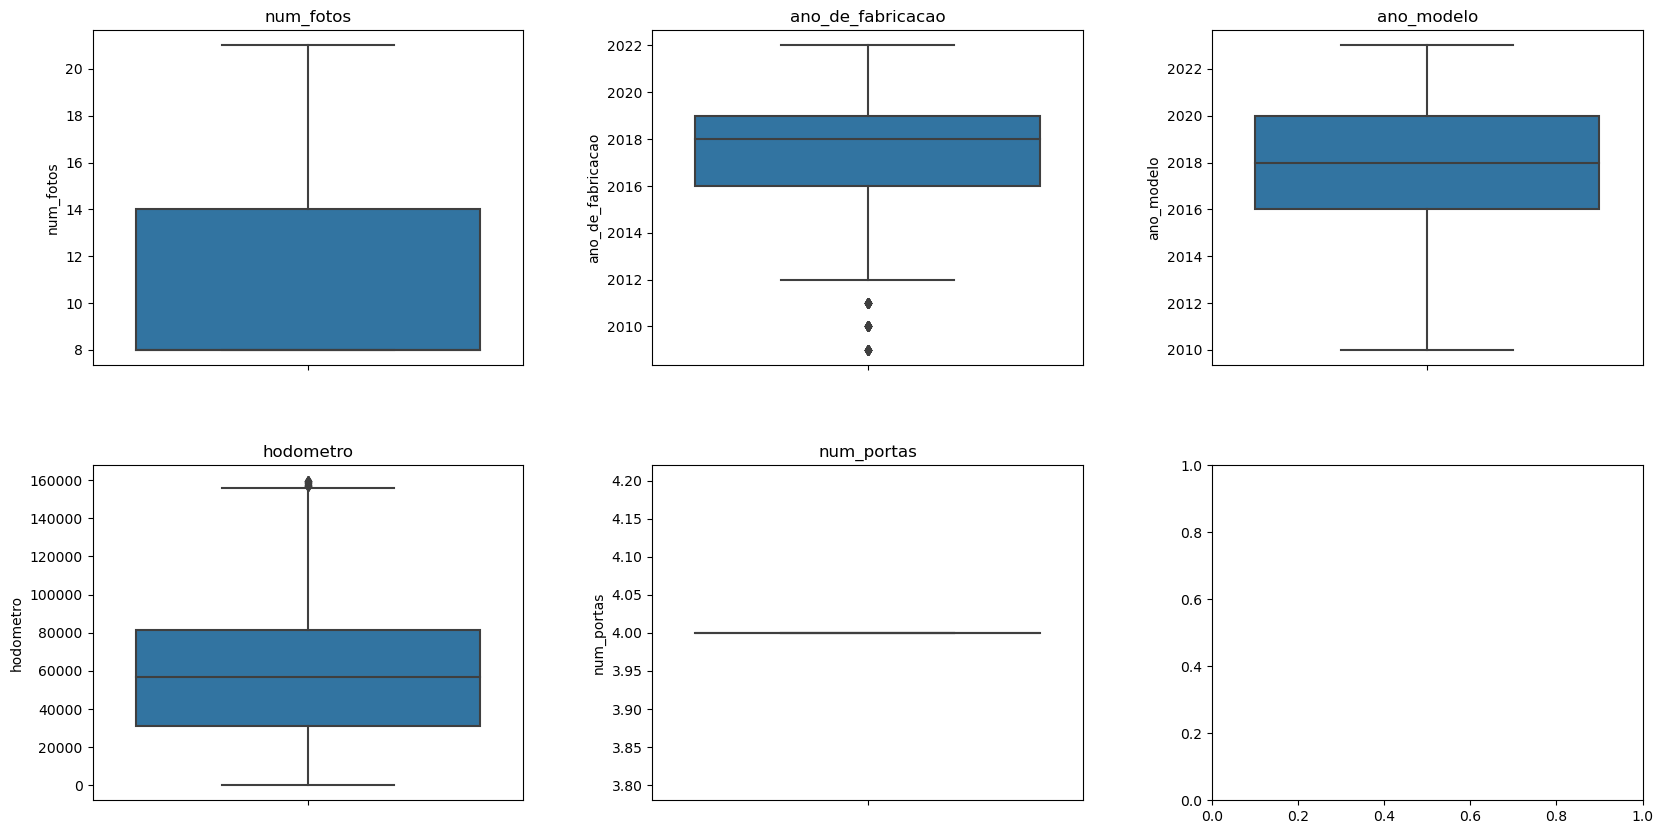

In [20]:
## OBSERVANDO COM BOXPLOT OS DADOS TRATADOS

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axs = axs.ravel()

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(y=coluna, data=df_cars_test, ax=axs[i], showfliers=True)
    axs[i].set_title(coluna)

plt.show()

### Salvando o novo DataFrame df_cars_test_final tratado em um novo arquivo CSV

In [21]:
df_cars_test_final = df_cars_test.copy()  # Copia o DataFrame original para preservar os dados originais

# Salvar o DataFrame tratado em um novo arquivo CSV
df_cars_test_final.to_csv('df_cars_test_final.csv', index=False)

### Com base na exploração dos dados, realizamos os seguintes procedimentos para tratar os dados:
- Importamos as bibliotécas uteis
- Importamos os dados
- Análise exploratória dos dados numéricos
- Análise exploratória dos dados categóricos
- Produção de insigths
- Salvar o DataFrame tratado em um novo arquivo CSV